In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

plt.style.use('ggplot')

In [2]:
df = pd.read_csv('train.csv')

In [3]:
df.head()

,ID,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,1,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,2,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
3,5,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
4,7,0.08829,12.5,7.87,0,0.524,6.012,66.6,5.5605,5,311,15.2,395.60,12.43,22.9


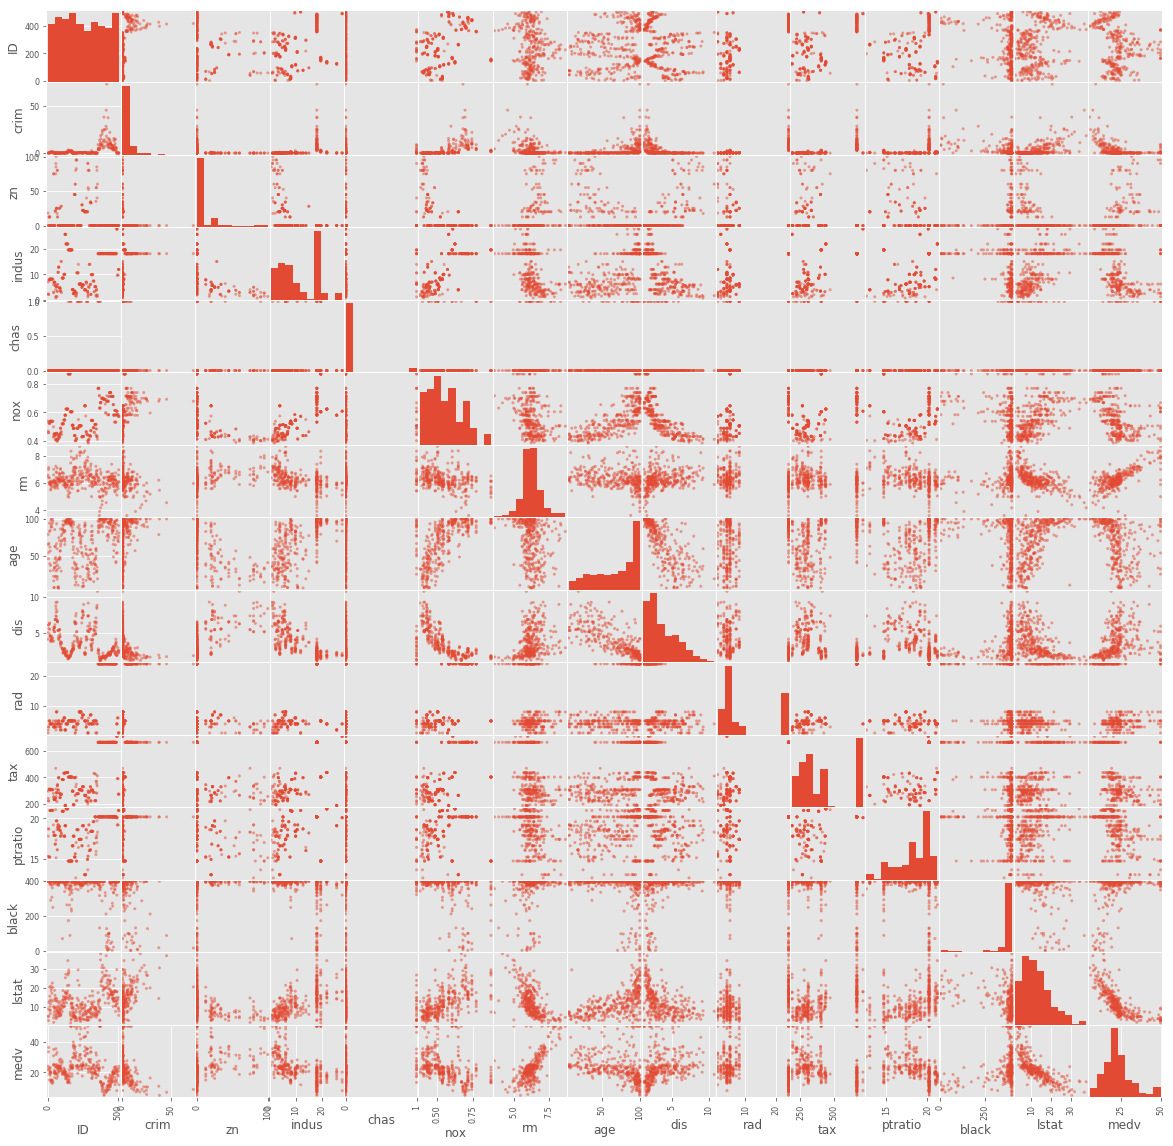

In [4]:
pd.plotting.scatter_matrix(df,figsize=(20,20));

   # Comparing Distance from Employment Centers and Pollution

Column 'dis', weighted mean of distances to five Boston employment centers, was split at near half of max by those within 5 units and those greater than 5 units. It was assumed that towns closer to places of employment would naturally have a greater population density, and a greater amount of traffic, which would result in higher pollution. Comparing 'nox', nitrogen oxides concentration (parts per 10 million), and 'dis' should see higher pollution closer to employment centers,i.e. 'nox' decreases when 'dis' increases.

In [5]:
df['dis'].describe()

count    333.000000
mean       3.709934
std        1.981123
min        1.129600
25%        2.122400
50%        3.092300
75%        5.116700
max       10.710300
Name: dis, dtype: float64

In [6]:
dist_set1 = df.loc[df['dis']<=5]
dist_set2 = df.loc[df['dis']>5]

In [7]:
dist_set1[['dis','nox']].describe()

,dis,nox
count,246.000000,246.000000
mean,2.705341,0.599048
std,0.958689,0.103730
min,1.129600,0.437000
25%,1.937800,0.515000
50%,2.507150,0.583500
75%,3.419900,0.679000
max,4.967100,0.871000


In [8]:
dist_set2[['dis','nox']].describe()

,dis,nox
count,87.000000,87.000000
mean,6.550506,0.438656
std,1.218172,0.033695
min,5.100400,0.385000
25%,5.491700,0.413000
50%,6.336100,0.431000
75%,7.308150,0.448000
max,10.710300,0.524000


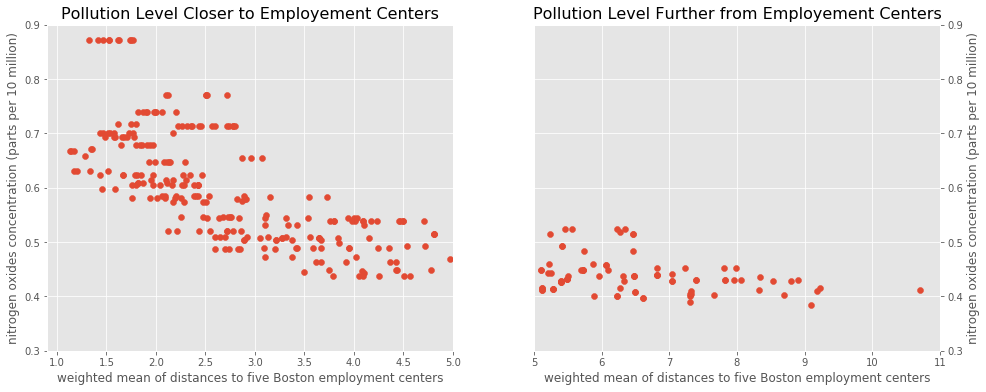

In [9]:
fig = plt.figure(figsize=(16,6))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)

ax1.scatter(dist_set1['dis'],dist_set1['nox'])
ax1.set_xlim(0.9,5), ax1.set_ylim(0.3,0.9)

ax1.set_title('Pollution Level Closer to Employement Centers', fontsize=16)
ax1.set_xlabel('weighted mean of distances to five Boston employment centers', fontsize=12)
ax1.set_ylabel('nitrogen oxides concentration (parts per 10 million)', fontsize=12)

ax2.scatter(dist_set2['dis'],dist_set2['nox'])
ax2.set_xlim(5,11), ax2.set_ylim(0.3,0.9)

ax2.set_title('Pollution Level Further from Employement Centers', fontsize=16)
ax2.set_xlabel('weighted mean of distances to five Boston employment centers', fontsize=12)
ax2.set_ylabel('nitrogen oxides concentration (parts per 10 million)', fontsize=12)
ax2.yaxis.tick_right()
ax2.yaxis.set_label_position('right')

plt.show()

# Comparing Crime Rate in Communities Based on Median Home Value

Column 'medv',median value of owner-occupied homes in $10000s, was split at the median value of 21.6. It is expected that poorer communities are more likely to have a higher crime rate. As seen from above, populations tend to be higher closer to centers of employment. It is predicted that a higher population density would also contribute to an increased crime rate.

In [10]:
df['medv'].describe()

count    333.000000
mean      22.768769
std        9.173468
min        5.000000
25%       17.400000
50%       21.600000
75%       25.000000
max       50.000000
Name: medv, dtype: float64

In [11]:
medv_set1 = df.loc[df['medv']<=21.6]
medv_set2 = df.loc[df['medv']>21.6]

In [12]:
medv_set1[['medv','crim','dis']].describe()

,medv,crim,dis
count,167.000000,167.000000,167.000000
mean,16.293413,5.823166,3.047181
std,3.986999,9.575560,1.727426
min,5.000000,0.013600,1.137000
25%,13.700000,0.171310,1.842250
50%,17.400000,1.413850,2.399900
75%,19.500000,8.224335,3.871450
max,21.600000,73.534100,10.710300


In [13]:
medv_set2[['medv','crim','dis']].describe()

,medv,crim,dis
count,166.000000,166.000000,166.000000
mean,29.283133,0.882681,4.376678
std,8.258326,2.050597,2.000844
min,21.700000,0.006320,1.129600
25%,23.300000,0.053853,2.750200
50%,25.000000,0.113805,3.945400
75%,32.850000,0.520470,5.680800
max,50.000000,13.522200,9.222900


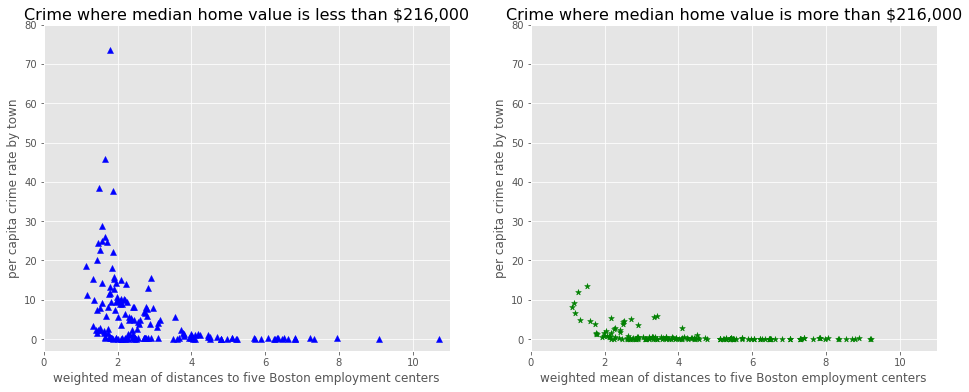

In [14]:
fig = plt.figure(figsize=(16,6))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)

ax1.scatter(medv_set1['dis'],medv_set1['crim'], color='blue', marker='^')
ax1.set_xlim(0,11), ax1.set_ylim(-3,80)

ax1.set_title('Crime where median home value is less than $216,000', fontsize=16)
ax1.set_xlabel('weighted mean of distances to five Boston employment centers', fontsize=12)
ax1.set_ylabel('per capita crime rate by town', fontsize=12)

ax2.scatter(medv_set2['dis'],medv_set2['crim'], color='green', marker='*')
ax2.set_xlim(0,11), ax2.set_ylim(-3,80)

ax2.set_title('Crime where median home value is more than $216,000', fontsize=16)
ax2.set_xlabel('weighted mean of distances to five Boston employment centers', fontsize=12)
ax2.set_ylabel('per capita crime rate by town', fontsize=12)

plt.show()

# Comparing Property Tax Rate with Communities Varying in Percentage of Population Considered Lower Status

When looking at property tax rate, higher rates typically detracts lower status buyers. The relationship between property tax rate and lower status communities will be examined. First, 'lstat', the lower status of the population (percent), will be split in half to see which communities pay higher property taxes. Then 'tax', full-value property-tax rate per $10,000, will be split in half to verify the conclusion. 

In [15]:
df['lstat'].describe()

count    333.000000
mean      12.515435
std        7.067781
min        1.730000
25%        7.180000
50%       10.970000
75%       16.420000
max       37.970000
Name: lstat, dtype: float64

In [16]:
df['tax'].describe()

count    333.000000
mean     409.279279
std      170.841988
min      188.000000
25%      279.000000
50%      330.000000
75%      666.000000
max      711.000000
Name: tax, dtype: float64

In [17]:
lstat_set1 = df.loc[df['lstat']<=10.97]
lstat_set2 = df.loc[df['lstat']>10.97]

tax_set1 = df.loc[df['tax']<=330]
tax_set2 = df.loc[df['tax']>330]

In [18]:
lstat_set1['tax'].describe()

count    167.000000
mean     320.784431
std      110.013423
min      193.000000
25%      253.000000
50%      296.000000
75%      341.000000
max      666.000000
Name: tax, dtype: float64

In [19]:
lstat_set2['tax'].describe()

count    166.000000
mean     498.307229
std      175.074760
min      188.000000
25%      308.000000
50%      437.000000
75%      666.000000
max      711.000000
Name: tax, dtype: float64

In [20]:
tax_set1['lstat'].describe()

count    169.000000
mean       9.441893
std        5.119586
min        1.980000
25%        5.700000
50%        8.470000
75%       11.500000
max       29.550000
Name: lstat, dtype: float64

In [21]:
tax_set2['lstat'].describe()

count    164.000000
mean      15.682683
std        7.405693
min        1.730000
25%       10.390000
50%       14.780000
75%       19.562500
max       37.970000
Name: lstat, dtype: float64

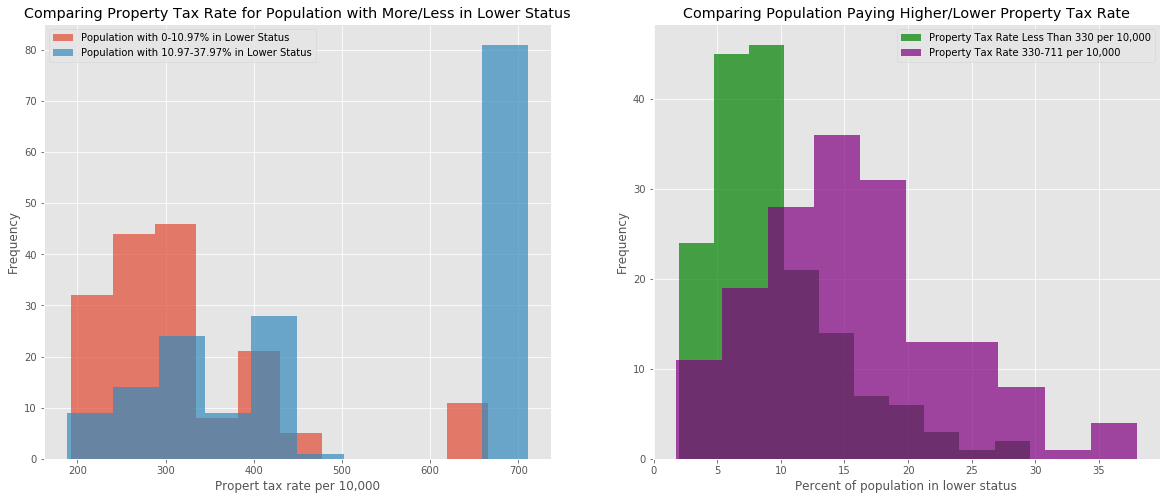

In [23]:
fig = plt.figure(figsize=(20,8))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)

ax1.hist(lstat_set1['tax'], alpha=0.7, label='Population with 0-10.97% in Lower Status')
ax1.hist(lstat_set2['tax'], alpha=0.7, label='Population with 10.97-37.97% in Lower Status')

ax1.legend()
ax1.set_title('Comparing Property Tax Rate for Population with More/Less in Lower Status')
ax1.set_xlabel('Propert tax rate per 10,000')
ax1.set_ylabel('Frequency')

ax2.hist(tax_set1['lstat'], color='green', alpha=0.7, label='Property Tax Rate Less Than 330 per 10,000')
ax2.hist(tax_set2['lstat'], color='purple', alpha=0.7, label='Property Tax Rate 330-711 per 10,000')

ax2.legend()
ax2.set_title('Comparing Population Paying Higher/Lower Property Tax Rate')
ax2.set_xlabel('Percent of population in lower status')
ax2.set_ylabel('Frequency')

plt.show()

In the first histogram, we see that in communities with less in the lower status, a majority enjoy a lower property tax rate. For the communities with more in the lower status, we see the opposite with a minority paying a lower property tax rate, and a possible outlier with the majority paying the peak property tax rate. Additional data would be needed to confirm the possibility that this anomaly is caused by high end homes with higher tax rates. It was not expected that a greater percentage of lower status would be paying higher taxes.

In the second histogram, it appears that areas with around 15% of the population in lower status pays more than the median property tax rate. On the other hand, areas with between 5% and 10% of the population in lower status pays less than the median. Based on this dataset, it is concluded that the supposedly poorer communities have a higher over-all property tax rate. There is the possibility that the higher property tax rate is contributing to a greater percentage of the population being in lower status.